Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'UNI3'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-30,28.971149,27.020401,28.485998,27.986523,560514222.0,27.986523
2021-03-31,30.268213,27.984856,27.984856,28.739431,751718827.0,28.739431
2021-04-01,30.205492,28.707283,28.736803,30.175646,535780413.0,30.175646
2021-04-02,32.503799,29.544437,30.163252,29.549885,901722733.0,29.549885
2021-04-03,31.601421,29.306843,29.536936,31.065556,457926442.0,31.065556
...,...,...,...,...,...,...
2021-06-16,22.919666,21.498079,21.852688,22.154892,247003560.0,22.154892
2021-06-17,22.261383,19.646008,22.186533,20.393362,330277776.0,20.393362
2021-06-18,20.979424,19.864414,20.421415,19.910807,268928418.0,19.910807


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2021-03-30 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       83 non-null     float64
 1   Low        83 non-null     float64
 2   Open       83 non-null     float64
 3   Close      83 non-null     float64
 4   Volume     83 non-null     float64
 5   Adj Close  83 non-null     float64
 6   Spread     83 non-null     float64
dtypes: float64(7)
memory usage: 5.2 KB


## Plot the closing value of Uniswap over time

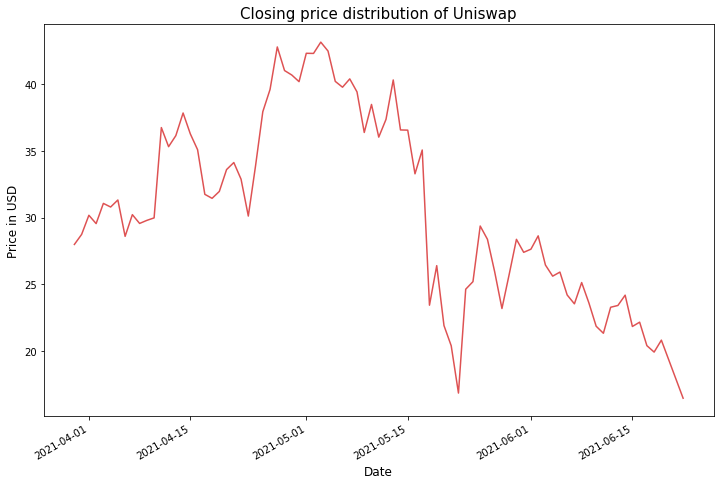

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Uniswap", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-30,28.971149,27.020401,28.485998,27.986523,560514222.0,27.986523
2021-03-31,30.268213,27.984856,27.984856,28.739431,751718827.0,28.739431
2021-04-01,30.205492,28.707283,28.736803,30.175646,535780413.0,30.175646
2021-04-02,32.503799,29.544437,30.163252,29.549885,901722733.0,29.549885
2021-04-03,31.601421,29.306843,29.536936,31.065556,457926442.0,31.065556
...,...,...,...,...,...,...
2021-06-16,22.919666,21.498079,21.852688,22.154892,247003560.0,22.154892
2021-06-17,22.261383,19.646008,22.186533,20.393362,330277776.0,20.393362
2021-06-18,20.979424,19.864414,20.421415,19.910807,268928418.0,19.910807


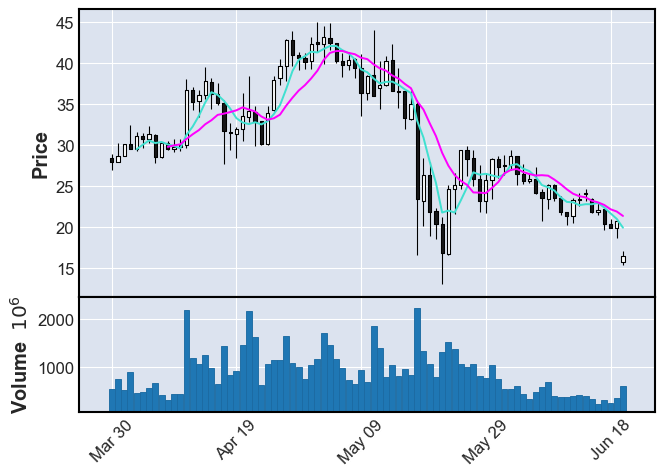

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
0,2021-03-30,27.986523
1,2021-03-31,28.739431
2,2021-04-01,30.175646
3,2021-04-02,29.549885
4,2021-04-03,31.065556
...,...,...
78,2021-06-16,22.154892
79,2021-06-17,20.393362
80,2021-06-18,19.910807
81,2021-06-19,20.806513


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
85,2021-06-25,16.346668,13.889902,18.964372
86,2021-06-26,16.485189,13.800648,19.375938
87,2021-06-27,17.165741,14.174249,20.185083
88,2021-06-28,17.460559,14.386043,20.678296
89,2021-06-29,16.091359,12.413696,19.940348


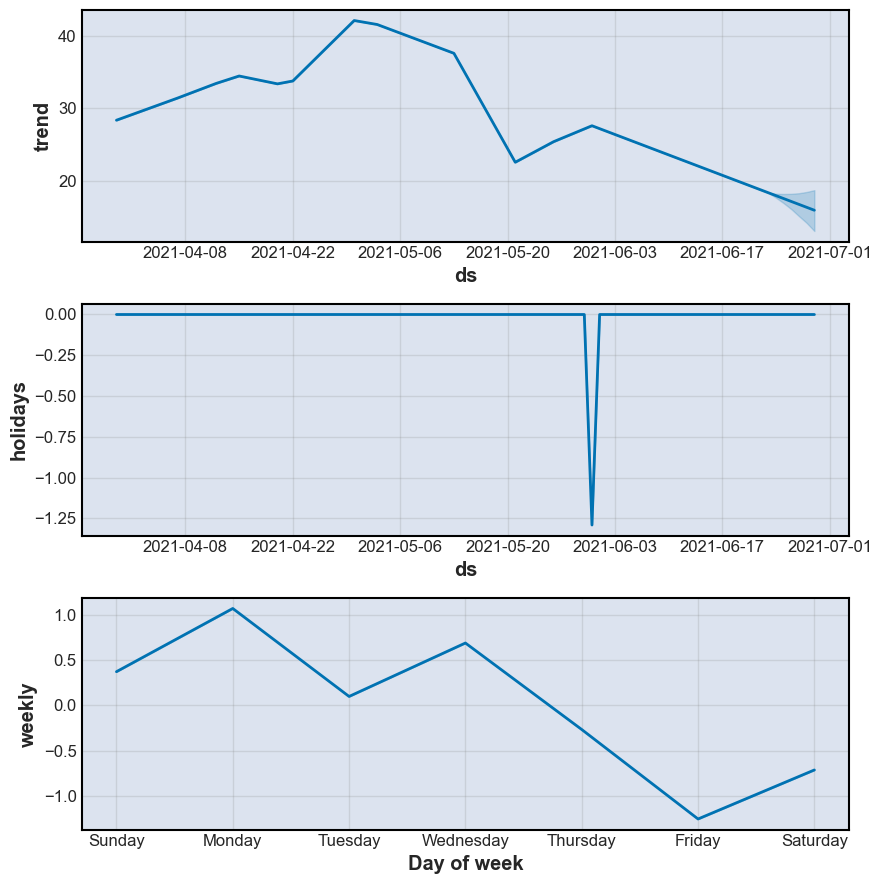

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

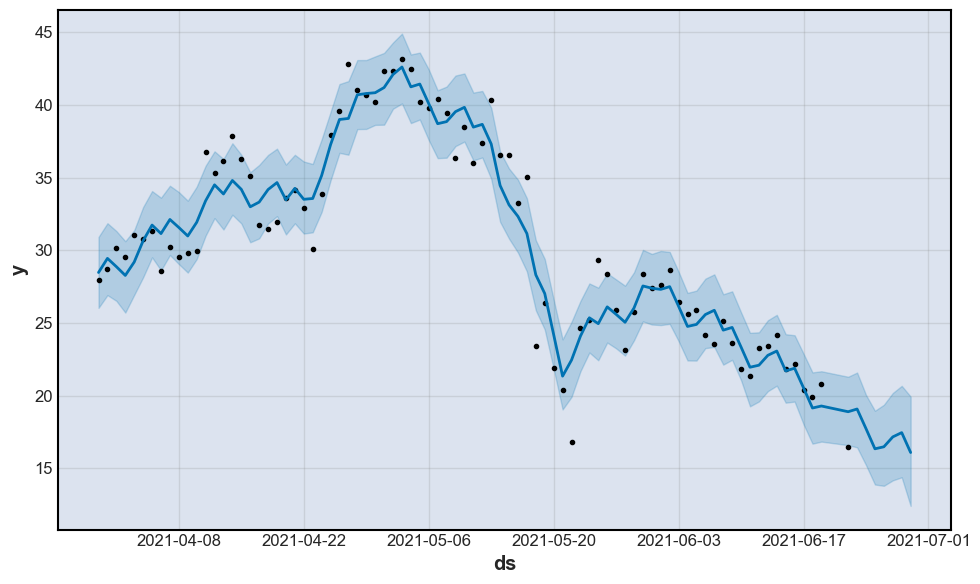

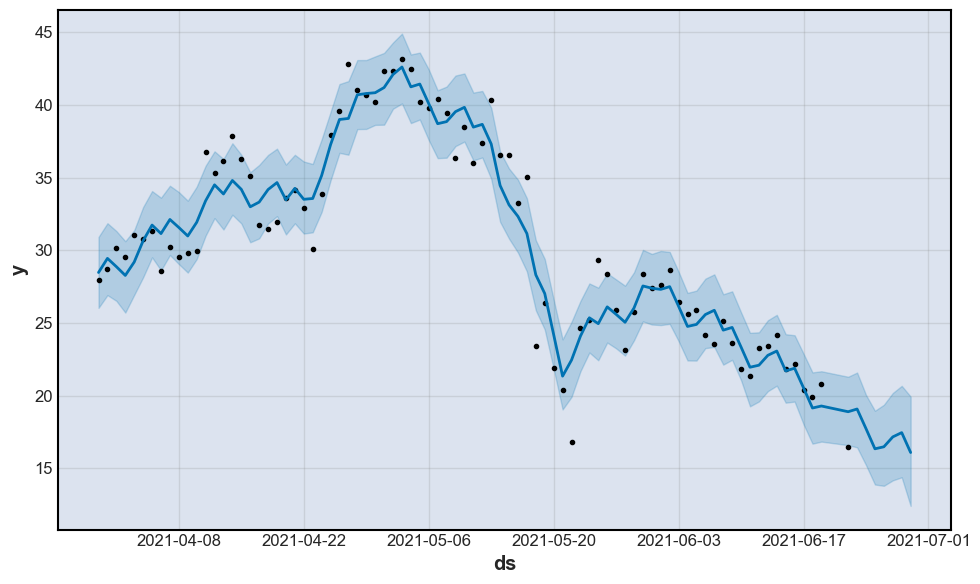

In [10]:
m.plot(forecast)